Group 15 Code Snippets

In [9]:
%conda install -c conda-forge wordcloud

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::certifi-2019.9.11-py37_0
  - anaconda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
import string
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import feature_extraction
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Initial Analysis

In [2]:
disaster_info=pd.read_csv('train.csv')

Lets print disaster info to see details about the data.

In [3]:
disaster_info.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lets see how much entries we have in the data.

In [4]:
disaster_info.shape

(7613, 5)

Now lets see the type of data that we are using and their data types. And the missing data

In [5]:
disaster_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


As we can see there are 4 columns.
Two of the columns are integer and 2 are categorical types.
There are missing values in the keyword and the location columns.
The target is the dependeable variable and others are independent variables.


In [6]:
disaster_info.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Lets visualize how the training data is divided. We will observe if there is any imbalance between postive values(Not Real Disasters i.e 0) and negative values (Real Disasters i.e 1) in the data.

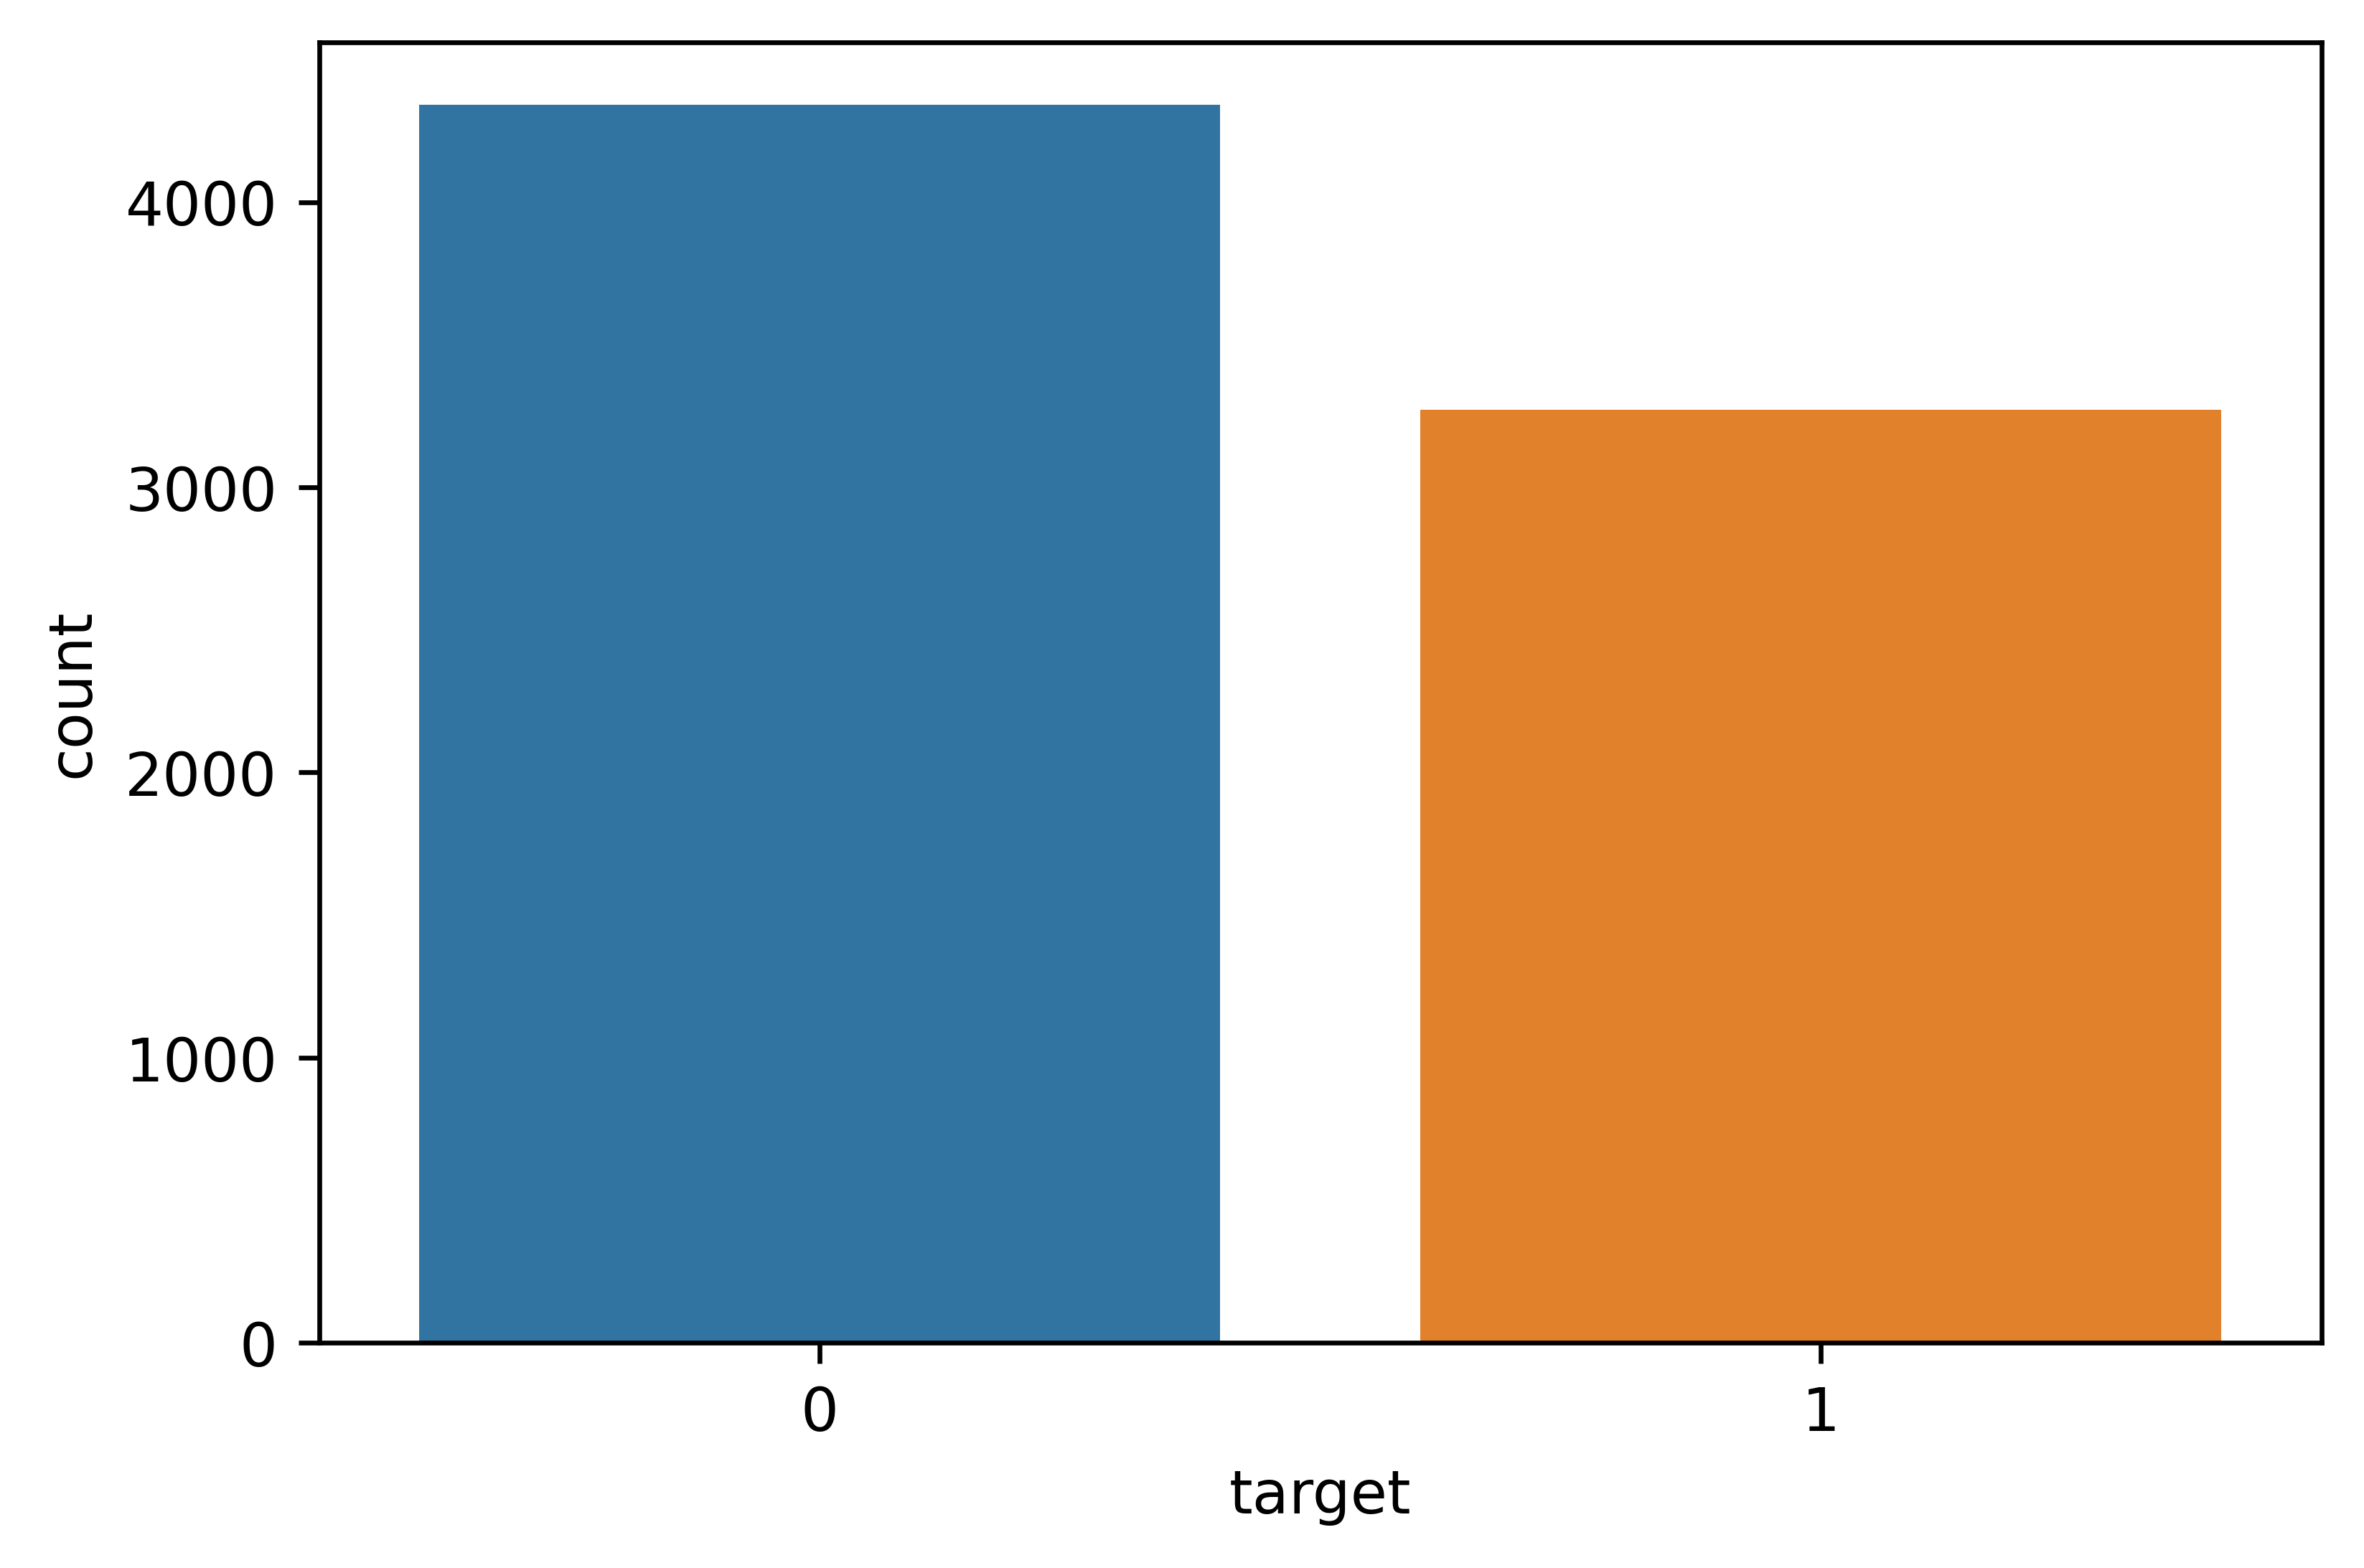

In [7]:
fig=plt.figure(dpi=600)
sns.countplot('target',data=disaster_info)


As we can see that there is an imbalance between both the postive values and negative values related to disaster analysis. We can observe that number of not real disasters are more than the number of real disasters. This can make our prediction model biased. So we trade variability of data to offset the bias and make use of the sampling technique to reduce the imbalance of the target variable. On of the steps that we will need to do is to perform sampling such that the data provided to the machine learning algorithm will have equal samples of both postive and negative cases.


Let see how many unique keywords we have in the keywords to understand what type of disasters are we seeing.

In [8]:
disaster_info['keyword'].dropna().unique().shape


(221,)

In [9]:
disaster_info['keyword'].dropna().unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [10]:
disaster_info.groupby(['keyword']).count()['id']

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Name: id, Length: 221, dtype: int64

There are 221 unique keywords and we plotted the above unique keywords and their frequencies.
Lets plot this data.

In [11]:
groupedData=disaster_info.groupby(['keyword']).sum()
groupedData.reset_index(inplace=True)
groupedData.head()

,keyword,id,target
0,ablaze,2534,13
1,accident,4263,24
2,aftershock,5825,0
3,airplane%20accident,7705,30
4,ambulance,10224,20


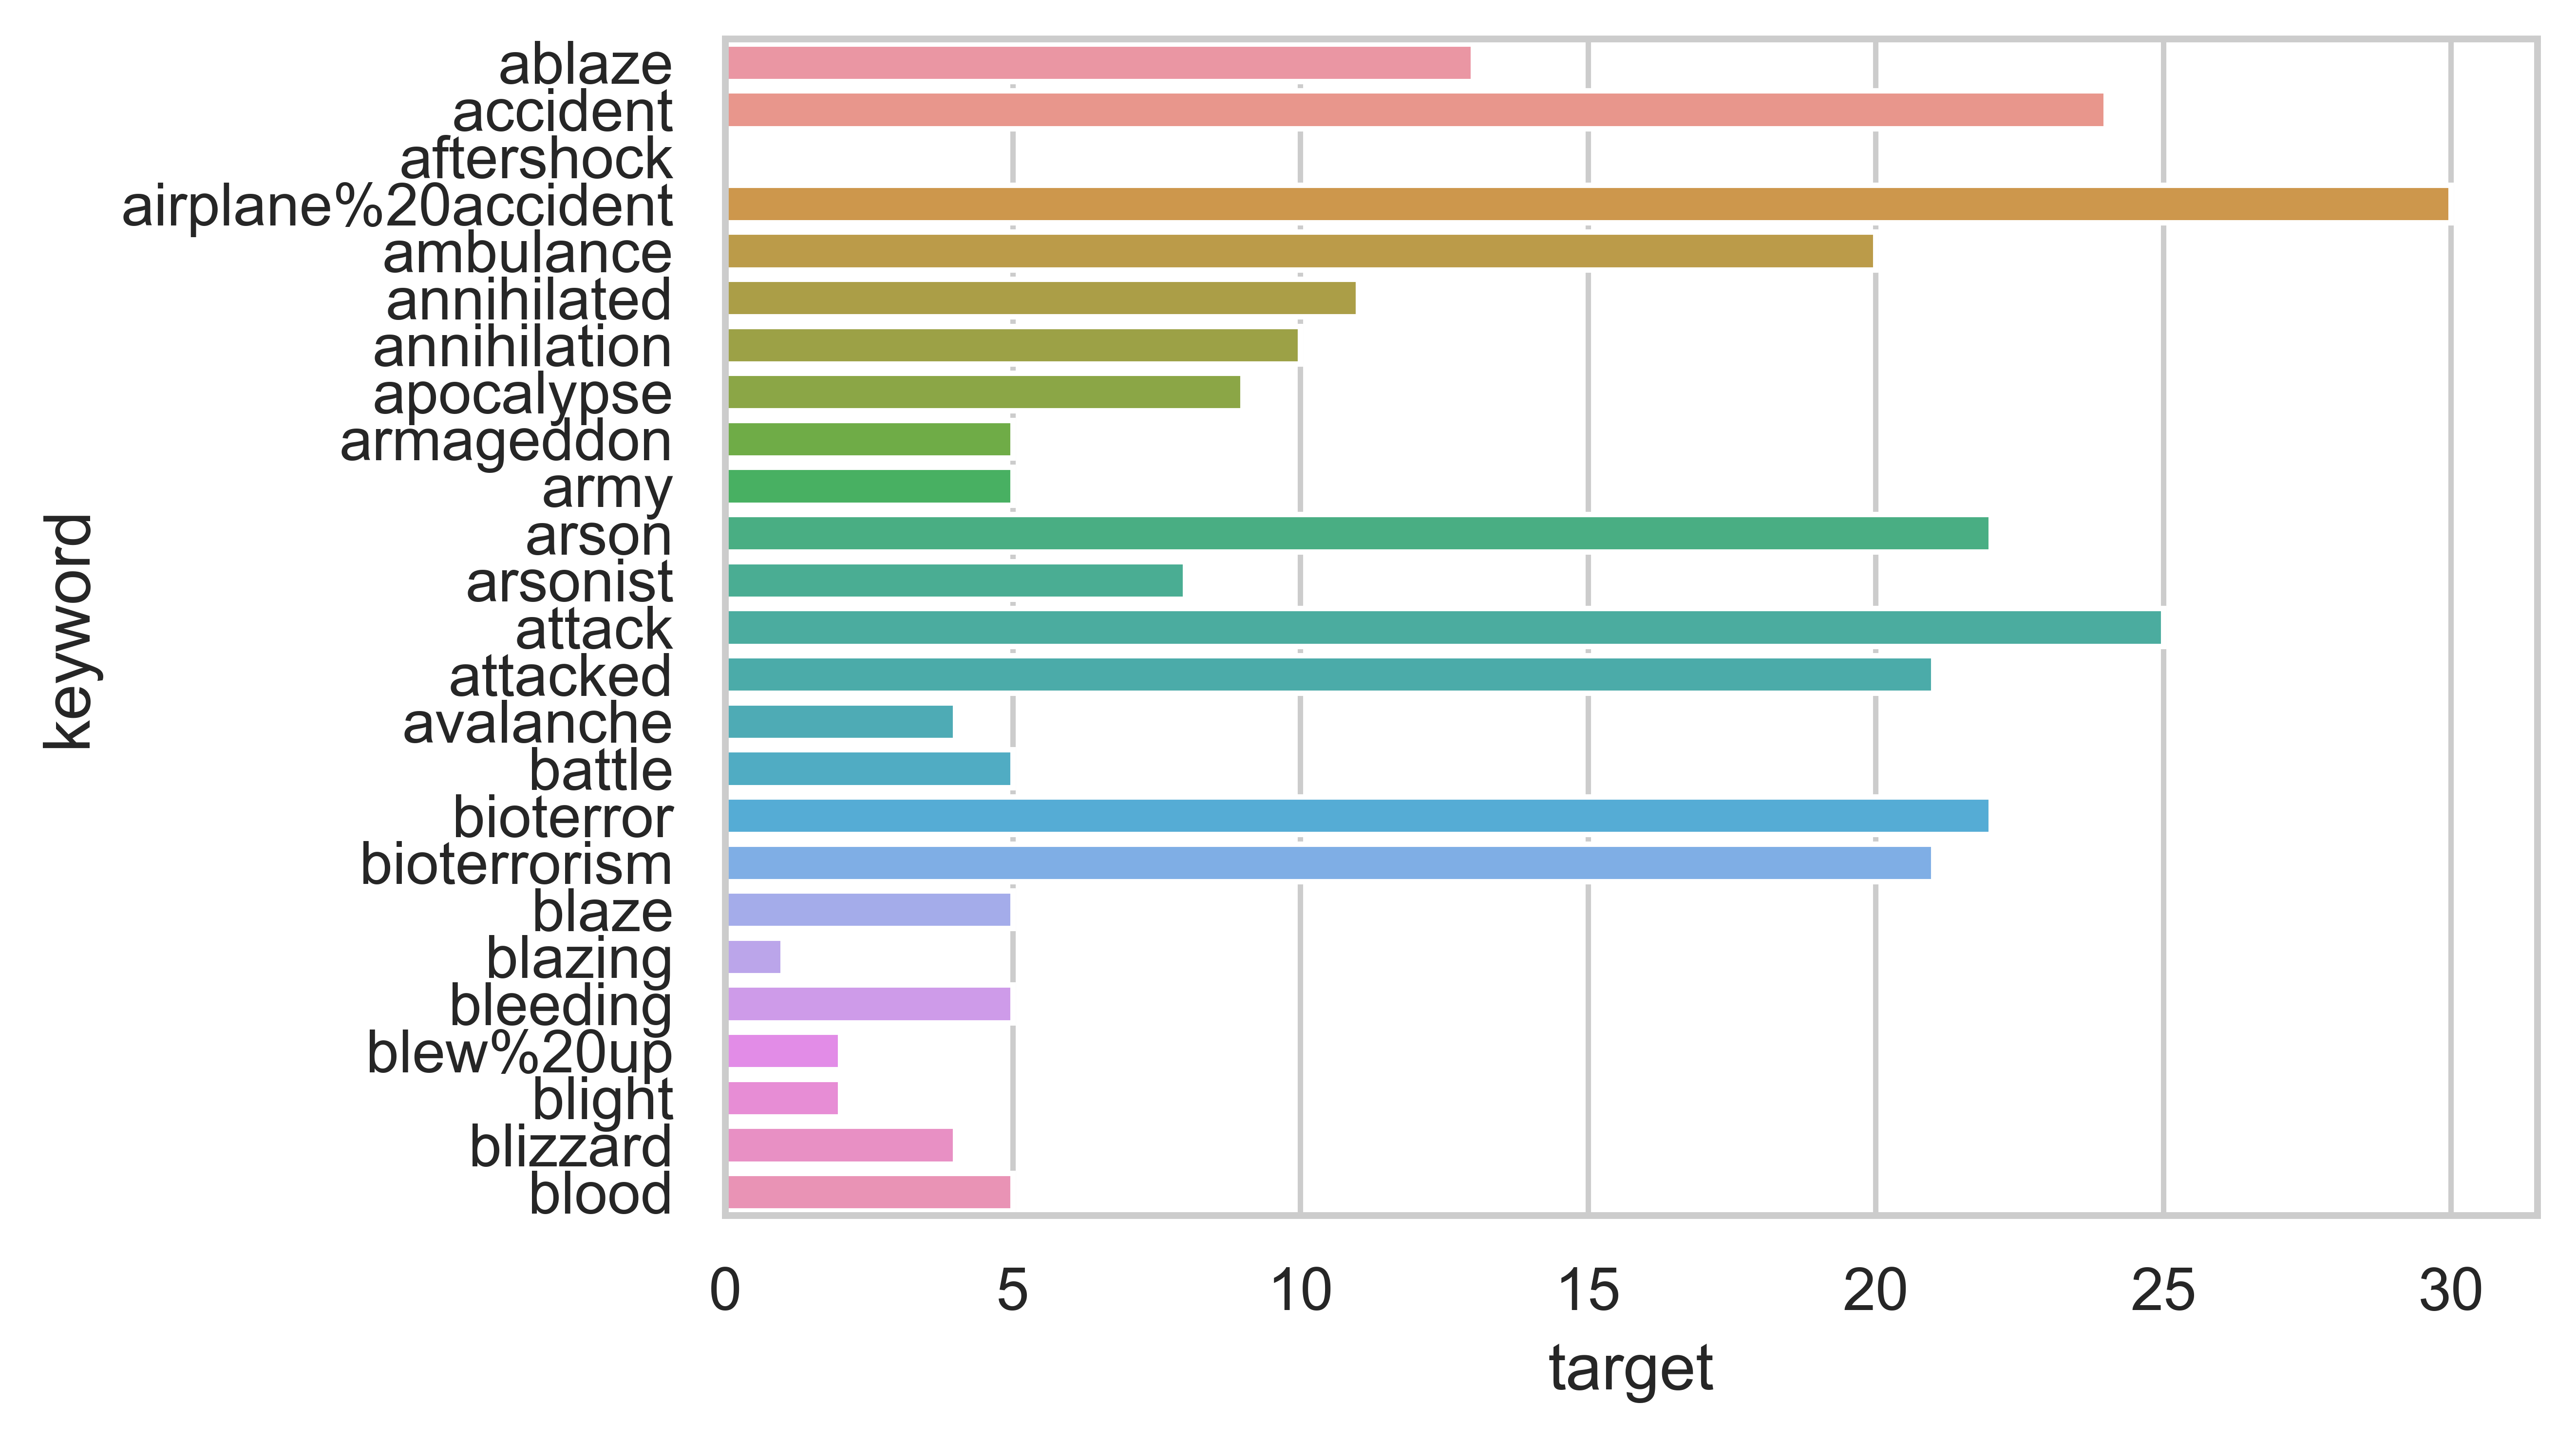

In [12]:
fig=plt.figure(dpi=800)
sns.set(style="whitegrid")
sns.barplot(x='target',y='keyword',data=groupedData.head(25))

This tell us that the keywords are also not equally distributed.




In [13]:
groupedData.loc[groupedData['target']==0].groupby('keyword').count()

,id,target
keyword,,
aftershock,1,1


Now lets find for which keyword there are more true disasters seen.

In [14]:
disaster_count_by_keywords=disaster_info.loc[disaster_info['target']==1].groupby('keyword').sum().sort_values(by=['target'],ascending=False)
disaster_count_by_keywords

,id,target
keyword,,
derailment,137519,39
wreckage,419629,39
outbreak,295212,39
debris,115672,37
oil%20spill,278260,37
...,...,...
blazing,982,1
epicentre,4706,1
body%20bag,1409,1


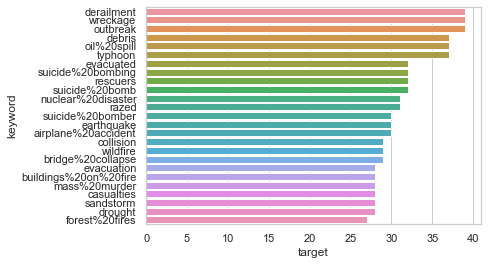

In [15]:
sns.set(style="whitegrid")
disaster_count_by_keywords.reset_index(inplace=True)
sns.barplot(x='target',y='keyword',data=disaster_count_by_keywords.head(25))

So we can see that the keywords with derailment, wreckage, outbreak, debris , oil spill have more number of disasters seen. 
This gives us a general idea about the keywords that are associated with actual disasters

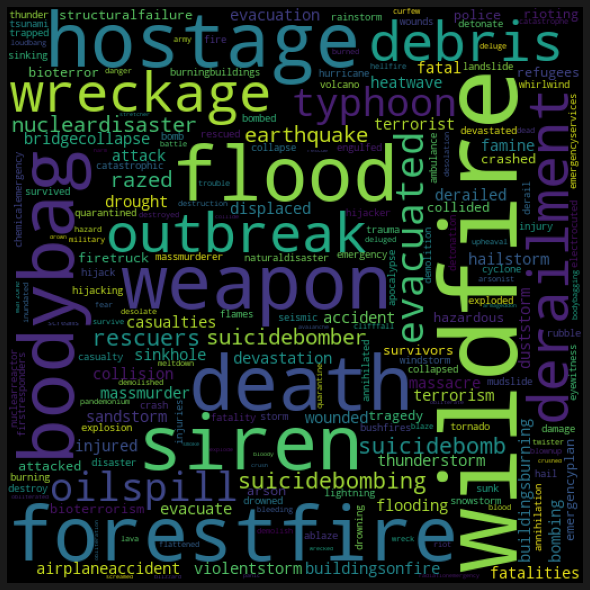

In [16]:
disaster_keywords = ' '.join(list(disaster_count_by_keywords['keyword']))
disaster_keywords=disaster_keywords.replace('%20','')
disaster_wc = WordCloud(width = 512,height = 512).generate(disaster_keywords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(disaster_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

2. Preprocessing

The categorical type of data is present which is requires a lot of preprocessing before we can use the data for machine learning algorithms etc.

The following data preprocessing steps will be taken:
1. Remove HTML tags
2. Remove Usernames by @
3. Remove URLs
4. Remove accented characters
5. Make lowercase
6. Remove punctuations
7. Remove Extra space
8. Remove stop words
9. Remove special characters or any symbols
10. Remove numbers
11. Lemmatization


In [17]:
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import re, string 
import pandas as pd   
from collections import defaultdict
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [18]:
from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
from pycontractions import Contractions
import gensim.downloader as api

#This will give us stop words
#en_default = en_core_web_md
nlp = spacy.load('en_default') 


# Choose model accordingly for contractions function
model = api.load("glove-twitter-25")

# model = api.load("glove-twitter-100")
# model = api.load("word2vec-google-news-300")

cont = Contractions(kv_model=model)
cont.load_models()


INFO - 17:56:16: loading projection weights from C:\Users\akash/gensim-data\glove-twitter-25\glove-twitter-25.gz
INFO - 17:56:55: loaded (1193514, 25) matrix from C:\Users\akash/gensim-data\glove-twitter-25\glove-twitter-25.gz


In [19]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:

# exclude words from spacy stopwords list
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False


def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

def remove_punctuation_function(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,;'+string.punctuation+']')
    text = REPLACE_BY_SPACE_RE.sub('', text)
    return text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = list(cont.expand_texts([text], precise=True))[0]
    return text
def remove_user_name(text):
    """Remove the twitter usernames, e.g. @usatoday,@bbcmtd """
    text = re.sub('@[^\s]+', '', text)
    return text

def remove_urls(text):
    """Remove the urls, e.g. http://t.co/lHYXEOHY6C"""
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    return text



def text_preprocessing(text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=False,remove_punctuation=True,remove_user=True,remove_url=True):
    """preprocess text with default option set to true for all steps"""
    if remove_html == True: #remove html tags
        text = strip_html_tags(text)
    if remove_user == True:#remove twitter user names
        text=remove_user_name(text)
    if remove_url == True:#remove the urls from the tweets
        text=remove_urls(text)
    if accented_chars == True: #remove accented characters
        text = remove_accented_chars(text)
    if contractions == True: #expand contractions
        text = expand_contractions(text)
    if lowercase == True: #convert all characters to lowercase
        text = text.lower()
    if remove_punctuation == True: #remove punctuation
        text=remove_punctuation_function(text)
    if extra_whitespace == True: #remove extra whitespaces
        text = remove_whitespace(text)

    doc = nlp(text) #tokenise text

    clean_text = []
    #clean_string=""
    
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
            flag = False
        # remove punctuations
        if punctuations == True and token.pos_ == 'PUNCT' and flag == True: 
            flag = False
        # remove special characters
        if special_chars == True and token.pos_ == 'SYM' and flag == True: 
            flag = False
        # remove numbers
        if remove_num == True and (token.pos_ == 'NUM' or token.text.isnumeric()) \
        and flag == True:
            flag = False
        # convert number words to numeric numbers
        if convert_num == True and token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)
            #clean_string=clean_string + " " + edit
    return clean_text
    #return clean_string

In [21]:
sentence="FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/c0p3SEsqWm via @usatoday"
print(text_preprocessing(sentence))

['fedex', 'no', 'longer', 'to', 'transport', 'bioterror', 'germ', 'in', 'wake', 'of', 'anthrax', 'lab', 'mishap', 'via']


In [22]:
words_list=[]
for line in disaster_info[['text']].values:
    cleaned=text_preprocessing(line[0])
    words_list.append(cleaned)

INFO - 17:57:24: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 17:57:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:24: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 17:57:28: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 17:57:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:28: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 17:57:28: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:57:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:28: built Dictionary(3 unique tokens: ['up', 'has', 'what']) from 2 documents (total 4 corpus positions)
INFO - 17:57:28: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:57:28: adding documen

INFO - 17:57:33: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:57:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:33: built Dictionary(18 unique tokens: ['a', 'annihilated', 'because', 'from', 'great']...) from 2 documents (total 34 corpus positions)
INFO - 17:57:33: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:57:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:33: built Dictionary(17 unique tokens: ['a', 'annihilated', 'because', 'from', 'great']...) from 2 documents (total 34 corpus positions)
INFO - 17:57:34: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:57:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:34: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 17:57:34: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:57:34: 

INFO - 17:57:36: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:36: built Dictionary(15 unique tokens: ['a', 'armageddon', 'bears', 'certainty', 'coat']...) from 2 documents (total 36 corpus positions)
INFO - 17:57:36: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:36: built Dictionary(15 unique tokens: ['a', 'armageddon', 'bears', 'certainty', 'coat']...) from 2 documents (total 36 corpus positions)
INFO - 17:57:37: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:57:37: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:57:37: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:57:37: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
IN

INFO - 17:57:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:42: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 17:57:42: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:42: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 17:57:42: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:42: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 17:57:42: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:57:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:42: built Dictionary(11 unique tokens: ['and'

INFO - 17:57:44: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:44: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 17:57:44: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:44: built Dictionary(18 unique tokens: ['a', 'actually', 'are', 'blight', 'dwarves']...) from 2 documents (total 43 corpus positions)
INFO - 17:57:44: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:44: built Dictionary(18 unique tokens: ['a', 'actually', 'are', 'blight', 'dwarves']...) from 2 documents (total 43 corpus positions)
INFO - 17:57:44: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:57:44: add

INFO - 17:57:46: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:57:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:46: built Dictionary(15 unique tokens: ['a', 'and', 'big', 'blood', 'but']...) from 2 documents (total 35 corpus positions)
INFO - 17:57:46: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:57:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:46: built Dictionary(11 unique tokens: ['as', 'awful', 'bloody', 'from', 'have']...) from 2 documents (total 20 corpus positions)
INFO - 17:57:46: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:57:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:46: built Dictionary(11 unique tokens: ['as', 'awful', 'bloody', 'from', 'have']...) from 2 documents (total 20 corpus positions)
INFO - 17:57:46: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:46: adding document #0 to D

INFO - 17:57:48: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:48: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 17:57:48: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:57:48: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:48: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 17:57:49: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:57:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:49: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 17:57:49: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:57:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:49: built Dictio

INFO - 17:57:51: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 17:57:51: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:51: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 17:57:52: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:52: built Dictionary(18 unique tokens: ['babies', 'beat', 'boxer', 'buildings', 'burning']...) from 2 documents (total 36 corpus positions)
INFO - 17:57:52: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:52: built Dictionary(18 unique tokens: ['babies', 'beat', 'boxer', 'buildings', 'burning']...) f

INFO - 17:57:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:54: built Dictionary(16 unique tokens: ['because', 'burning', 'if', 'is', 'it']...) from 2 documents (total 36 corpus positions)
INFO - 17:57:54: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:54: built Dictionary(6 unique tokens: ['burning', 'except', 'idk', 'really', 'has']...) from 2 documents (total 10 corpus positions)
INFO - 17:57:54: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:54: built Dictionary(6 unique tokens: ['burning', 'except', 'idk', 'really', 'is']...) from 2 documents (total 10 corpus positions)
INFO - 17:57:54: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:57:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:54: built Dictionary(12 uni

INFO - 17:57:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:57: built Dictionary(20 unique tokens: ['a', 'baseball', 'best', 'catastrophic', 'grab']...) from 2 documents (total 38 corpus positions)
INFO - 17:57:58: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:58: built Dictionary(11 unique tokens: ['a', 'about', 'building', 'do', 'inside']...) from 2 documents (total 22 corpus positions)
INFO - 17:57:58: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:57:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:57:58: built Dictionary(11 unique tokens: ['a', 'about', 'building', 'do', 'inside']...) from 2 documents (total 22 corpus positions)
INFO - 17:57:59: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:57:59: adding 

INFO - 17:58:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:02: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 17:58:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:02: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 17:58:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:02: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 17:58:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:02: adding document #0 to Dictionary(0 uni

INFO - 17:58:06: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:58:06: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:06: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:58:06: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:06: built Dictionary(13 unique tokens: ['a', 'and', 'chrissie', 'deaths', 'finn']...) from 2 documents (total 25 corpus positions)
INFO - 17:58:06: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:06: built Dictionary(13 unique tokens: ['a', 'and', 'chrissie', 'deaths', 'finn']...) from 2 documents (total 25 corpus positions)
INFO - 17:58:07: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:07:

INFO - 17:58:09: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:09: built Dictionary(20 unique tokens: ['and', 'are', 'colour', 'deluged', 'e']...) from 2 documents (total 42 corpus positions)
INFO - 17:58:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:58:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:09: built Dictionary(17 unique tokens: ['and', 'are', 'deluged', 'likely', 'of']...) from 2 documents (total 38 corpus positions)
INFO - 17:58:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:58:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:09: built Dictionary(17 unique tokens: ['and', 'are', 'deluged', 'likely', 'of']...) from 2 documents (total 38 corpus positions)
INFO - 17:58:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:58:09: adding document #0

INFO - 17:58:12: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 17:58:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:12: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 17:58:12: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:12: built Dictionary(9 unique tokens: ['is', 'made', 'not', 'to', 'totally']...) from 2 documents (total 16 corpus positions)
INFO - 17:58:12: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:12: built Dictionary(8 unique tokens: ['is', 'made', 'not', 'to', 'totally']...) from 2 documents (total 16 corpus positions)
INFO - 17:58:12: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 17:58:12: adding document #0 to Dic

INFO - 17:58:15: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:58:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:15: built Dictionary(13 unique tokens: ['be', 'destroyed', 'every', 'got', 'have']...) from 2 documents (total 24 corpus positions)
INFO - 17:58:15: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:58:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:15: built Dictionary(13 unique tokens: ['be', 'destroyed', 'every', 'got', 'have']...) from 2 documents (total 24 corpus positions)
INFO - 17:58:15: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:15: built Dictionary(12 unique tokens: ['#bored', 'a', 'forsee', 'in', 'loose']...) from 2 documents (total 22 corpus positions)
INFO - 17:58:15: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:15: adding documen

INFO - 17:58:18: built Dictionary(12 unique tokens: ['but', 'different', 'for', 'hey', 'more']...) from 2 documents (total 22 corpus positions)
INFO - 17:58:19: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:19: built Dictionary(14 unique tokens: ['&', 'any', 'be', 'both', 'bud']...) from 2 documents (total 29 corpus positions)
INFO - 17:58:19: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:19: built Dictionary(14 unique tokens: ['&', 'any', 'be', 'both', 'bud']...) from 2 documents (total 29 corpus positions)
INFO - 17:58:19: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:19: built Dictionary(13 unique tokens: ['-', 'a', 'daily', 'desert', 'finding']...) from 2 documents (total 24 corpus

INFO - 17:58:21: built Dictionary(12 unique tokens: ['am', 'and', 'drowning', 'going', 'hw']...) from 2 documents (total 22 corpus positions)
INFO - 17:58:21: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:21: built Dictionary(12 unique tokens: ['am', 'and', 'drowning', 'going', 'hw']...) from 2 documents (total 22 corpus positions)
INFO - 17:58:21: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:21: built Dictionary(11 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 17:58:21: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:21: built Dictionary(10 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents 

INFO - 17:58:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:24: built Dictionary(19 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 39 corpus positions)
INFO - 17:58:24: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:24: built Dictionary(21 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 44 corpus positions)
INFO - 17:58:24: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:24: built Dictionary(22 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 44 corpus positions)
INFO - 17:58:24: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:24: built Dictionary(22 unique tokens

INFO - 17:58:30: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:58:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:30: built Dictionary(7 unique tokens: ['going', 'mess', 'to', 'up', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 17:58:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:30: built Dictionary(13 unique tokens: ['atomic', 'day.', 'exploded', 'in', 'is']...) from 2 documents (total 24 corpus positions)
INFO - 17:58:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:30: built Dictionary(12 unique tokens: ['atomic', 'day.', 'exploded', 'in', 'is']...) from 2 documents (total 24 corpus positions)
INFO - 17:58:30: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:30: adding document #0 to

INFO - 17:58:35: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:35: built Dictionary(11 unique tokens: ['a', 'every', 'fatality', 'makes', 'me']...) from 2 documents (total 20 corpus positions)
INFO - 17:58:35: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:35: built Dictionary(11 unique tokens: ['a', 'every', 'fatality', 'makes', 'me']...) from 2 documents (total 20 corpus positions)
INFO - 17:58:36: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:58:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:36: built Dictionary(24 unique tokens: ['a', 'and', 'because', 'but', 'every']...) from 2 documents (total 56 corpus positions)
INFO - 17:58:36: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:58:36: adding document #0 

INFO - 17:58:38: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:38: built Dictionary(21 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 17:58:38: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:38: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:38: built Dictionary(23 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 52 corpus positions)
INFO - 17:58:39: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:39: built Dictionary(23 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 52 corpus positions)
INFO - 17:58:39: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:58:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:39: built Dictionary(16 unique tokens: [

INFO - 17:58:43: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:43: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:43: built Dictionary(10 unique tokens: ['do', 'flood', 'his', 'in', 'not']...) from 2 documents (total 18 corpus positions)
INFO - 17:58:43: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:43: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:43: built Dictionary(10 unique tokens: ['do', 'flood', 'his', 'in', 'not']...) from 2 documents (total 18 corpus positions)
INFO - 17:58:44: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:44: built Dictionary(20 unique tokens: ['can', 'charging', 'come', 'dilute', 'flooding']...) from 2 documents (total 40 corpus positions)
INFO - 17:58:44: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:44: adding document #0 to

INFO - 17:58:49: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 17:58:49: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:58:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:49: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 17:58:49: Removed 9 and 9 OOV words from document 1 and 2 (respectively).
INFO - 17:58:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:49: built Dictionary(16 unique tokens: ['#mufc', 'back', 'better', 'dear', 'has']...) from 2 documents (total 31 corpus positions)
INFO - 17:58:49: Removed 9 and 9 OOV words from document 1 and 2 (respectively).
INFO - 17:58:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:49: built Dictionary(16 unique tokens: ['#mufc', 'back', 'better', 'dear', 'has']...) from 2 documents (total 31 co

INFO - 17:58:51: built Dictionary(11 unique tokens: ['cool', 'finally', 'heat', 'kind', 'kulli']...) from 2 documents (total 20 corpus positions)
INFO - 17:58:51: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:58:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:51: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 17:58:51: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:58:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:51: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 17:58:51: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:51: built Dictionary(17 unique tokens: ['bcuz', 'cooler', 'dances', 'feeling', 'for']...) from 2 do

INFO - 17:58:54: built Dictionary(8 unique tokens: ['every', 'injured', 'why', 'wonder', 'year']...) from 2 documents (total 14 corpus positions)
INFO - 17:58:54: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:54: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 17:58:54: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:54: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 17:58:54: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:54: built Dictionary(7 unique tokens: ['is', 'only', 'surprise', 'that', 'they']...) from 2 docum

INFO - 17:58:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:57: built Dictionary(22 unique tokens: ['about', 'articles', 'be', 'but', 'by']...) from 2 documents (total 44 corpus positions)
INFO - 17:58:57: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:57: built Dictionary(15 unique tokens: ['a', 'are', 'be', 'caught', 'for']...) from 2 documents (total 44 corpus positions)
INFO - 17:58:57: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:57: built Dictionary(16 unique tokens: ['a', 'are', 'be', 'caught', 'for']...) from 2 documents (total 44 corpus positions)
INFO - 17:58:57: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:57: built Dictionary(16 unique tokens: ['a',

INFO - 17:58:59: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:59: built Dictionary(18 unique tokens: ['a', 'become', 'daily', 'deal', 'dickheads']...) from 2 documents (total 40 corpus positions)
INFO - 17:58:59: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:58:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:59: built Dictionary(18 unique tokens: ['a', 'become', 'daily', 'deal', 'dickheads']...) from 2 documents (total 40 corpus positions)
INFO - 17:58:59: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:58:59: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 17:58:59: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:58:59: adding document

INFO - 17:59:02: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 17:59:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:02: built Dictionary(15 unique tokens: ['a', 'and', 'between', 'dears', 'difference']...) from 2 documents (total 30 corpus positions)
INFO - 17:59:02: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:02: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:59:02: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:02: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:59:02: Removed 9 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:59:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:02: built Dictionary(10 unique tokens: ['a', 'am', 'chewing', 'like', 'on']...) from 2 documents (total 22 corpus positions)
INFO - 17:59:02:

INFO - 17:59:05: built Dictionary(17 unique tokens: ['and', 'far', 'fixing', 'govt', 'if']...) from 2 documents (total 36 corpus positions)
INFO - 17:59:05: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:05: built Dictionary(11 unique tokens: ['always', 'are', 'but', 'like', 'many']...) from 2 documents (total 22 corpus positions)
INFO - 17:59:05: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:05: built Dictionary(12 unique tokens: ['always', 'are', 'but', 'like', 'many']...) from 2 documents (total 22 corpus positions)
INFO - 17:59:06: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:06: built Dictionary(8 unique tokens: ['an', 'how', 'oil', 'respond', 'tell']...) from 2 documents (total 1

INFO - 17:59:08: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:59:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:08: built Dictionary(13 unique tokens: ['bad', 'been', 'haha.', 'have', 'not']...) from 2 documents (total 24 corpus positions)
INFO - 17:59:08: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 17:59:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:08: built Dictionary(13 unique tokens: ['bad', 'been', 'haha.', 'have', 'not']...) from 2 documents (total 24 corpus positions)
INFO - 17:59:08: Removed 4 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:08: built Dictionary(20 unique tokens: ['brothers', 'debbie', 'found', 'had', 'his']...) from 2 documents (total 42 corpus positions)
INFO - 17:59:08: Removed 4 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:08: adding document #

INFO - 17:59:13: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:59:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:13: built Dictionary(12 unique tokens: ['a', 'ass', 'big', 'jail', 'me']...) from 2 documents (total 23 corpus positions)
INFO - 17:59:13: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:59:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:13: built Dictionary(17 unique tokens: ['ally', 'an', 'because', 'cannot', 'did']...) from 2 documents (total 34 corpus positions)
INFO - 17:59:13: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 17:59:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:13: built Dictionary(17 unique tokens: ['ally', 'an', 'because', 'cannot', 'did']...) from 2 documents (total 34 corpus positions)
INFO - 17:59:13: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:13: adding document #0 to D

INFO - 17:59:16: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 17:59:16: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:16: built Dictionary(7 unique tokens: ['&', 'am', 'can', 'he', 'hot']...) from 2 documents (total 14 corpus positions)
INFO - 17:59:16: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:16: built Dictionary(7 unique tokens: ['&', 'am', 'can', 'he', 'hot']...) from 2 documents (total 14 corpus positions)
INFO - 17:59:16: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:16: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 17:59:16: Remove

INFO - 17:59:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:18: built Dictionary(13 unique tokens: ['a', 'been', 'everyday', 'for', 'it']...) from 2 documents (total 26 corpus positions)
INFO - 17:59:18: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:59:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:18: built Dictionary(13 unique tokens: ['a', 'been', 'everyday', 'for', 'it']...) from 2 documents (total 26 corpus positions)
INFO - 17:59:19: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:59:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:19: built Dictionary(20 unique tokens: ['a', 'announce', 'are', 'bc', 'dull']...) from 2 documents (total 44 corpus positions)
INFO - 17:59:19: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 17:59:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:19: built Dictionary(19 unique tokens: [

INFO - 17:59:21: built Dictionary(21 unique tokens: ['about', 'dance', 'for', 'hasil', 'in']...) from 2 documents (total 46 corpus positions)
INFO - 17:59:21: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:21: built Dictionary(20 unique tokens: ['about', 'dance', 'for', 'hasil', 'in']...) from 2 documents (total 46 corpus positions)
INFO - 17:59:21: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:21: built Dictionary(10 unique tokens: ['all', 'could', 'okay', 'storm', 'that']...) from 2 documents (total 22 corpus positions)
INFO - 17:59:21: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:21: built Dictionary(10 unique tokens: ['all', 'could', 'okay', 'storm', 'that']...) from 2 documents (t

INFO - 17:59:24: built Dictionary(10 unique tokens: ['.', 'but', 'final', 'have', 'is']...) from 2 documents (total 19 corpus positions)
INFO - 17:59:24: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 17:59:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:24: built Dictionary(10 unique tokens: ['.', 'but', 'final', 'have', 'is']...) from 2 documents (total 19 corpus positions)
INFO - 17:59:24: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:24: built Dictionary(23 unique tokens: ['&', 'a', 'been', 'can', 'going']...) from 2 documents (total 52 corpus positions)
INFO - 17:59:24: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:24: built Dictionary(23 unique tokens: ['&', 'a', 'been', 'can', 'going']...) from 2 documents (total 52 corpus positions

INFO - 17:59:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:27: built Dictionary(16 unique tokens: ['-->', 'already', 'and', 'biggest', 'for']...) from 2 documents (total 36 corpus positions)
INFO - 17:59:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:27: built Dictionary(12 unique tokens: ['a', 'dick', 'hes', 'like', 'never']...) from 2 documents (total 21 corpus positions)
INFO - 17:59:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:27: built Dictionary(12 unique tokens: ['a', 'dick', 'hes', 'like', 'never']...) from 2 documents (total 21 corpus positions)
INFO - 17:59:27: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:59:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:27: built Dictionary(13 unique tokens: ['and', 'its', 'lightning', 'missed', 'rly']...) from 2 documents (total 24 corpus positions)
INFO - 17:59:27: Removed 4 and 3 OOV words from document 1 and 2 (

INFO - 17:59:29: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:29: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 17:59:29: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:29: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:29: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 17:59:29: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:29: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:29: built Dictionary(15 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 17:59:30: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:59:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:30: built Dictionary(21 unique tokens: ['a', '

INFO - 17:59:31: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:31: built Dictionary(7 unique tokens: ['know', 'to', 'trouble', 'who', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 17:59:31: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 17:59:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:31: built Dictionary(7 unique tokens: ['know', 'to', 'trouble', 'who', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 17:59:31: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:59:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:31: built Dictionary(20 unique tokens: ['all', 'are', 'bats', 'defense', 'in']...) from 2 documents (total 40 corpus positions)
INFO - 17:59:31: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:59:31: adding document #0 to Dic

INFO - 17:59:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:35: built Dictionary(7 unique tokens: ['a', 'going', 'like', 'war', 'zone']...) from 2 documents (total 12 corpus positions)
INFO - 17:59:35: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:35: built Dictionary(19 unique tokens: ['a', 'ahead', 'as', 'best', 'go']...) from 2 documents (total 40 corpus positions)
INFO - 17:59:35: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:35: built Dictionary(19 unique tokens: ['a', 'ahead', 'as', 'best', 'go']...) from 2 documents (total 40 corpus positions)
INFO - 17:59:35: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 17:59:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:35: built Dictionary(19 unique tokens: ['a', 'ahea

INFO - 17:59:39: built Dictionary(21 unique tokens: ['a', 'at', 'could', 'go', 'has']...) from 2 documents (total 44 corpus positions)
INFO - 17:59:39: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 17:59:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:39: built Dictionary(21 unique tokens: ['a', 'at', 'could', 'go', 'has']...) from 2 documents (total 44 corpus positions)
INFO - 17:59:39: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:59:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:39: built Dictionary(12 unique tokens: ['and', 'either', 'helping', 'my', 'surgical']...) from 2 documents (total 22 corpus positions)
INFO - 17:59:39: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 17:59:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 17:59:39: built Dictionary(12 unique tokens: ['and', 'either', 'helping', 'my', 'surgical']...) from 2 documents (total

In [23]:
words_list

word_freq={}
max_len=0

for item in words_list:
    if len(item) > max_len:
        max_len=len(item)
    for i in item:
        if i in word_freq.keys():
            word_freq[i]=word_freq[i]+1
        else:
            word_freq[i]=1

In [24]:
print(max_len)
print(len(word_freq))

31
13082


In [25]:
import gensim

Using Google pre-trained vectors trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases.

In [26]:

model = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\akash\\Downloads\\GoogleNews-vectors-negative300.bin\\GoogleNews-vectors-negative300.bin', binary=True)  
 

INFO - 18:00:26: loading projection weights from C:\Users\akash\Downloads\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin
INFO - 18:03:31: loaded (3000000, 300) matrix from C:\Users\akash\Downloads\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin


In [ ]:
model.init_sims(replace=True)

INFO - 18:03:43: precomputing L2-norms of word weight vectors


In [32]:
model.most_similar('weather')

[('wet_weather', 0.6928061842918396),
 ('Weather', 0.6667286157608032),
 ('inclement_weather', 0.6523535847663879),
 ('wintry_weather', 0.6318536400794983),
 ('wintery_weather', 0.6174376010894775),
 ('weatherwise', 0.6150212287902832),
 ('stormy_weather', 0.6111673712730408),
 ('Unusually_mild', 0.5986037850379944),
 ('Unseasonably_warm', 0.5984668731689453),
 ('wintry_conditions', 0.5980417728424072)]

In [33]:
from itertools import islice
list(islice(model.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [29]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [30]:
#Creating a train and test split
from sklearn.model_selection import train_test_split

def create_train_test():
    train, test = train_test_split(disaster_info[['text','target']], test_size=0.3, random_state = 42)
    test_tokenized = test.apply(lambda r: text_preprocessing(r['text']), axis=1).values
    train_tokenized = train.apply(lambda r: text_preprocessing(r['text']), axis=1).values
    return train, test,train_tokenized,test_tokenized 


In [24]:
train, test,train_tokenized,test_tokenized =create_train_test()

INFO - 18:44:20: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:20: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:20: built Dictionary(11 unique tokens: ['a', 'be', 'did', 'for', 'glad']...) from 2 documents (total 22 corpus positions)
INFO - 18:44:22: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:22: built Dictionary(11 unique tokens: ['a', 'be', 'did', 'for', 'glad']...) from 2 documents (total 22 corpus positions)
INFO - 18:44:22: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:44:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:22: built Dictionary(8 unique tokens: ['an', 'how', 'oil', 'respond', 'tell']...) from 2 documents (total 14 corpus positions)
INFO - 18:44:23: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:44:23: adding document #0 to Dictionary(0 u

INFO - 18:44:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:27: built Dictionary(13 unique tokens: ['and', 'answer', 'attacked', 'being', 'calmly']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:27: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:44:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:27: built Dictionary(17 unique tokens: ['and', 'do', 'exactly', 'fled', 'he']...) from 2 documents (total 37 corpus positions)
INFO - 18:44:27: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:44:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:27: built Dictionary(17 unique tokens: ['and', 'do', 'exactly', 'fled', 'he']...) from 2 documents (total 37 corpus positions)
INFO - 18:44:27: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:44:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:27: built Dictionary(9 unique 

INFO - 18:44:31: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:31: built Dictionary(15 unique tokens: ['about', 'comparing', 'emergency', 'haha', 'own']...) from 2 documents (total 28 corpus positions)
INFO - 18:44:31: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:31: built Dictionary(18 unique tokens: ['a', 'an', 'any', 'athlete', 'catastrophe']...) from 2 documents (total 38 corpus positions)
INFO - 18:44:31: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:31: built Dictionary(18 unique tokens: ['a', 'an', 'any', 'athlete', 'catastrophe']...) from 2 documents (total 38 corpus positions)
INFO - 18:44:31: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:31: ad

INFO - 18:44:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:33: built Dictionary(15 unique tokens: ['carry', 'duty', 'in', 'military', 'not']...) from 2 documents (total 28 corpus positions)
INFO - 18:44:33: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:44:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:33: built Dictionary(15 unique tokens: ['carry', 'duty', 'in', 'military', 'not']...) from 2 documents (total 28 corpus positions)
INFO - 18:44:33: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:44:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:33: built Dictionary(7 unique tokens: ['activity', 'by', 'casualties', 'the', 'to']...) from 2 documents (total 12 corpus positions)
INFO - 18:44:34: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:44:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:34: built Dictionary(7 u

INFO - 18:44:36: built Dictionary(11 unique tokens: ['been', 'given', 'guys', 'hear', 'that']...) from 2 documents (total 20 corpus positions)
INFO - 18:44:36: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:44:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:36: built Dictionary(11 unique tokens: ['been', 'given', 'guys', 'hear', 'that']...) from 2 documents (total 20 corpus positions)
INFO - 18:44:36: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:36: built Dictionary(4 unique tokens: ['getting', 'here', 'has', 'he']) from 2 documents (total 6 corpus positions)
INFO - 18:44:36: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:36: built Dictionary(4 unique tokens: ['getting', 'here', 'he', 'is']) from 2 documents (total 6 corpus positions)
I

INFO - 18:44:39: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:39: built Dictionary(10 unique tokens: ['an', 'and', 'does', 'end', 'imply']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:39: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:39: built Dictionary(10 unique tokens: ['an', 'and', 'does', 'end', 'imply']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:39: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:44:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:39: built Dictionary(11 unique tokens: ['already', 'and', 'are', 'be', 'drowning']...) from 2 documents (total 24 corpus positions)
INFO - 18:44:39: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:44:39: adding document #0 to D

INFO - 18:44:42: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:42: built Dictionary(11 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 18:44:42: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:42: built Dictionary(10 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 18:44:42: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 18:44:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:42: built Dictionary(15 unique tokens: ['a', 'and', 'between', 'dears', 'difference']...) from 2 documents (total 30 corpus positions)
INFO - 18:44:42: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 18:44:42: adding

INFO - 18:44:45: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:45: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 18:44:45: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:44:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:45: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 18:44:45: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 18:44:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:45: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 18:44:45: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 18:44:4

INFO - 18:44:47: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:47: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 18:44:47: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:47: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 18:44:47: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:47: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 18:44:47: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:44:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:47: built Dictionary(14 unique tokens: ['a', 'ball', 'by', 'foul', 'freak']...) from 2 documents (total 30 corpus positions)
INFO - 18:44:47: Remov

INFO - 18:44:50: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:50: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:50: built Dictionary(11 unique tokens: ['-', 'a', 'and', 'being', 'horrific']...) from 2 documents (total 34 corpus positions)
INFO - 18:44:50: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:44:50: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:50: built Dictionary(11 unique tokens: ['-', 'a', 'and', 'being', 'horrific']...) from 2 documents (total 34 corpus positions)
INFO - 18:44:50: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:44:50: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:50: built Dictionary(13 unique tokens: ['apocalypse', 'has', 'hot', 'kind', 'of']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:50: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:44:50: adding document #0 to 

INFO - 18:44:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:52: built Dictionary(14 unique tokens: ['and', 'been', 'for', 'fruit', 'good']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:52: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:44:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:52: built Dictionary(14 unique tokens: ['and', 'been', 'for', 'fruit', 'good']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:52: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:52: built Dictionary(13 unique tokens: ['a', 'approval', 'blown', 'did', 'get']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:52: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:52: built Dictionary(12 unique token

INFO - 18:44:54: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:44:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:54: built Dictionary(9 unique tokens: ['a', 'be', 'character', 'devastated', 'great']...) from 2 documents (total 16 corpus positions)
INFO - 18:44:54: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:54: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 18:44:54: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:54: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 18:44:55: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:44:55: adding documen

INFO - 18:44:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:57: built Dictionary(14 unique tokens: ['all', 'by', 'fantastic', 'for', 'now']...) from 2 documents (total 26 corpus positions)
INFO - 18:44:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:57: built Dictionary(9 unique tokens: ['crystals', 'dangling', 'hazardous', 'piercing', 'potentially']...) from 2 documents (total 16 corpus positions)
INFO - 18:44:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:44:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:44:57: built Dictionary(9 unique tokens: ['crystals', 'dangling', 'hazardous', 'piercing', 'potentially']...) from 2 documents (total 16 corpus positions)
INFO - 18:44:57: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:44:57: adding document #0 to Dictionary(0 unique tokens: [])
I

INFO - 18:45:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:00: built Dictionary(18 unique tokens: ['am', 'and', 'anything', 'battling', 'buildings']...) from 2 documents (total 43 corpus positions)
INFO - 18:45:00: Removed 6 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:45:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:00: built Dictionary(14 unique tokens: ['and', 'are', 'be', 'car', 'for']...) from 2 documents (total 29 corpus positions)
INFO - 18:45:00: Removed 6 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:45:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:00: built Dictionary(14 unique tokens: ['and', 'are', 'be', 'car', 'for']...) from 2 documents (total 29 corpus positions)
INFO - 18:45:00: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:00: built Dictionary(15 unique token

INFO - 18:45:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:02: built Dictionary(14 unique tokens: ['a', 'been', 'desolate', 'down', 'flight']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:02: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:45:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:02: built Dictionary(15 unique tokens: ['a', 'before', 'blew', 'clicks', 'could']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:02: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:45:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:02: built Dictionary(15 unique tokens: ['a', 'before', 'blew', 'clicks', 'could']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:02: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:02: built Dictionary(12 uni

INFO - 18:45:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:05: built Dictionary(13 unique tokens: ['click', 'hashtag', 'hijack', 'lots', 'of']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:05: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:05: built Dictionary(19 unique tokens: ['and', 'been', 'demolition', 'derby', 'down']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:05: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:05: built Dictionary(20 unique tokens: ['and', 'been', 'demolition', 'derby', 'down']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:06: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:06: built Dictiona

INFO - 18:45:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:08: built Dictionary(7 unique tokens: ['going', 'mess', 'to', 'up', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 18:45:08: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:08: built Dictionary(24 unique tokens: ['a', 'and', 'be', 'blown', 'but']...) from 2 documents (total 48 corpus positions)
INFO - 18:45:08: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:08: built Dictionary(24 unique tokens: ['a', 'and', 'be', 'blown', 'but']...) from 2 documents (total 48 corpus positions)
INFO - 18:45:09: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:09: built Dictionary(11 unique tokens: ['a', 'about

INFO - 18:45:11: built Dictionary(20 unique tokens: ['at', 'every', 'for', 'get', 'have']...) from 2 documents (total 42 corpus positions)
INFO - 18:45:11: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 18:45:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:11: built Dictionary(20 unique tokens: ['attack', 'for', 'governments', 'it', 'just']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:11: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 18:45:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:11: built Dictionary(20 unique tokens: ['attack', 'for', 'governments', 'it', 'just']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:11: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:11: built Dictionary(17 unique tokens: ['am', 'an', 'answer', 'call', 'emergency']...) from 2 do

INFO - 18:45:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:13: built Dictionary(20 unique tokens: ['am', 'around', 'away', 'can', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:13: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:13: built Dictionary(10 unique tokens: ['audience', 'because', 'lone', 'my', 'of']...) from 2 documents (total 20 corpus positions)
INFO - 18:45:13: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:13: built Dictionary(10 unique tokens: ['audience', 'because', 'lone', 'my', 'of']...) from 2 documents (total 20 corpus positions)
INFO - 18:45:13: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:13: built Dictionary(12 unique 

INFO - 18:45:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:17: built Dictionary(16 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:17: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:17: built Dictionary(16 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:17: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:17: built Dictionary(15 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:17: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:17: built Dic

INFO - 18:45:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:19: built Dictionary(13 unique tokens: ['a', 'be', 'bloody', 'but', 'day']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:19: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:19: built Dictionary(13 unique tokens: ['a', 'be', 'bloody', 'but', 'day']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:19: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:19: built Dictionary(21 unique tokens: ['a', 'and', 'battleship', 'but', 'cross']...) from 2 documents (total 42 corpus positions)
INFO - 18:45:19: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:19: built Dictionary(21 unique tokens: ['a

INFO - 18:45:22: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:22: built Dictionary(13 unique tokens: ['ankles', 'both', 'but', 'had', 'injuries']...) from 2 documents (total 24 corpus positions)
INFO - 18:45:22: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:22: built Dictionary(16 unique tokens: ['a', 'at', 'babes', 'ball', 'be']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:22: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:22: built Dictionary(16 unique tokens: ['a', 'at', 'babes', 'ball', 'be']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:22: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:45:22: adding document #0 to Dictio

INFO - 18:45:25: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:25: built Dictionary(11 unique tokens: ['a', 'bleeding', 'cams', 'cute', 'date']...) from 2 documents (total 20 corpus positions)
INFO - 18:45:25: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:25: built Dictionary(16 unique tokens: ['across', 'fire', 'hi', 'in', 'me']...) from 2 documents (total 32 corpus positions)
INFO - 18:45:25: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:25: built Dictionary(16 unique tokens: ['across', 'fire', 'hi', 'in', 'me']...) from 2 documents (total 32 corpus positions)
INFO - 18:45:25: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:25: adding document #0 to Dicti

INFO - 18:45:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:27: built Dictionary(13 unique tokens: ['a', 'can', 'crazy', 'damage', 'do']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:27: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:27: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 18:45:27: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:27: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 18:45:27: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:27: built Dictionary(18

INFO - 18:45:29: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:29: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:29: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 18:45:30: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:30: built Dictionary(19 unique tokens: ['a', 'absolutely', 'but', 'disaster', 'has']...) from 2 documents (total 42 corpus positions)
INFO - 18:45:30: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:30: built Dictionary(20 unique tokens: ['a', 'absolutely', 'but', 'disaster', 'has']...) from 2 documents (total 42 corpus positions)
INFO - 18:45:30: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:30: adding docu

INFO - 18:45:32: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:32: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:32: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:32: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:32: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:32: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:32: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:

INFO - 18:45:34: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:45:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:34: built Dictionary(15 unique tokens: ['as', 'be', 'come', 'down', 'market']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:34: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 18:45:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:34: built Dictionary(15 unique tokens: ['as', 'be', 'come', 'down', 'market']...) from 2 documents (total 30 corpus positions)
INFO - 18:45:35: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:35: built Dictionary(19 unique tokens: ['actually', 'annoyed', 'are', 'by', 'hung']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:35: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:35: adding document #0 t

INFO - 18:45:37: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:37: built Dictionary(7 unique tokens: ['a', 'going', 'like', 'war', 'zone']...) from 2 documents (total 12 corpus positions)
INFO - 18:45:37: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:37: built Dictionary(22 unique tokens: ['a', 'bomb', 'but', 'choice', 'choices']...) from 2 documents (total 48 corpus positions)
INFO - 18:45:37: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:37: built Dictionary(23 unique tokens: ['a', 'bomb', 'but', 'choice', 'choices']...) from 2 documents (total 48 corpus positions)
INFO - 18:45:37: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:37: adding document #0 to 

INFO - 18:45:39: Removed 9 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:45:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:39: built Dictionary(10 unique tokens: ['a', 'am', 'day', 'glad', 'lonely']...) from 2 documents (total 24 corpus positions)
INFO - 18:45:39: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:45:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:39: built Dictionary(3 unique tokens: ['to', 'shall', 'you']) from 2 documents (total 4 corpus positions)
INFO - 18:45:39: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:45:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:39: built Dictionary(3 unique tokens: ['to', 'will', 'you']) from 2 documents (total 4 corpus positions)
INFO - 18:45:40: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:40: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:40

INFO - 18:45:41: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:41: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:41: built Dictionary(21 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 18:45:41: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:41: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:41: built Dictionary(22 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 18:45:42: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:42: built Dictionary(22 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 18:45:42: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:42: adding document #0 to Dict

INFO - 18:45:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:44: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 18:45:44: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 18:45:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:44: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 18:45:44: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:44: built Dictionary(20 unique tokens: ['a', 'about', 'also', 'and', 'broken']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:44: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:45:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:44: built Dictionary(20 unique tokens: 

INFO - 18:45:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:47: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:47: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:45:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:47: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 18:45:47: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:47: built Dictionary(13 unique tokens: ['but', 'get', 'hard', 'is', 'means']...) from 2 documents (total 26 corpus positions)
INFO - 18:45:47: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:47: built Dictionary(12 unique tokens: ['but', 

INFO - 18:45:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:49: built Dictionary(10 unique tokens: ['do', 'electrocute', 'help', 'himself', 'let']...) from 2 documents (total 18 corpus positions)
INFO - 18:45:49: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:49: built Dictionary(9 unique tokens: ['a', 'happens', 'meets', 'tornado', 'volcano']...) from 2 documents (total 18 corpus positions)
INFO - 18:45:49: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:49: built Dictionary(9 unique tokens: ['a', 'happens', 'meets', 'tornado', 'volcano']...) from 2 documents (total 18 corpus positions)
INFO - 18:45:49: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:49: built Dicti

INFO - 18:45:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:52: built Dictionary(22 unique tokens: ['=', 'a', 'although', 'and', 'car']...) from 2 documents (total 44 corpus positions)
INFO - 18:45:52: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:52: built Dictionary(21 unique tokens: ['a', 'already', 'by', 'deal', 'done']...) from 2 documents (total 44 corpus positions)
INFO - 18:45:52: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 18:45:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:52: built Dictionary(21 unique tokens: ['a', 'already', 'by', 'deal', 'done']...) from 2 documents (total 44 corpus positions)
INFO - 18:45:52: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:45:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:52: built Dictionary(4 unique tokens: ['bl

INFO - 18:45:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:55: built Dictionary(12 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 25 corpus positions)
INFO - 18:45:55: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:45:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:55: built Dictionary(14 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 28 corpus positions)
INFO - 18:45:55: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 18:45:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:55: built Dictionary(14 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 28 corpus positions)
INFO - 18:45:55: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 18:45:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:55: built Dictionary(15 unique tokens: ['a', 'acte

INFO - 18:45:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:57: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 18:45:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:57: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 18:45:57: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:45:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:57: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 18:45:57: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 18:45:57: adding document #0 to Dictionary(0

INFO - 18:45:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:59: built Dictionary(15 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 18:45:59: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:59: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 18:45:59: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:59: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 18:45:59: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 18:45:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:45:59: built Dictionary(16 unique tokens: ['and',

INFO - 18:46:01: built Dictionary(15 unique tokens: ['a', 'be', 'but', 'demonstration', 'how']...) from 2 documents (total 28 corpus positions)
INFO - 18:46:01: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:46:01: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:01: built Dictionary(15 unique tokens: ['a', 'be', 'but', 'demonstration', 'how']...) from 2 documents (total 28 corpus positions)
INFO - 18:46:02: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:46:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:02: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 18:46:02: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 18:46:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:02: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 document

INFO - 18:46:04: built Dictionary(12 unique tokens: ['a', 'and', 'are', 'ask', 'do']...) from 2 documents (total 22 corpus positions)
INFO - 18:46:04: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:46:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:04: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 18:46:04: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 18:46:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:04: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 18:46:04: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:46:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:04: built Dictionary(13 unique tokens: ['been', 'for', 'going', 'it', 'on']...) from 2 documents (total 26 corpus posit

INFO - 18:46:05: built Dictionary(20 unique tokens: ['but', 'do', 'friends', 'give', 'guy']...) from 2 documents (total 45 corpus positions)
INFO - 18:46:06: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:46:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:06: built Dictionary(8 unique tokens: ['-', 'and', 'booze', 'friends', 'need']...) from 2 documents (total 14 corpus positions)
INFO - 18:46:06: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 18:46:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:06: built Dictionary(8 unique tokens: ['-', 'and', 'booze', 'friends', 'need']...) from 2 documents (total 14 corpus positions)
INFO - 18:46:06: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 18:46:06: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 18:46:06: built Dictionary(18 unique tokens: ['+', 'a', 'accident', 'airplane', 'bit']...) from 2 documents (total

In [57]:
train

,text,target
1186,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,CNN: Tennessee movie theater shooting suspect ...,1
5787,Still rioting in a couple of hours left until ...,1
7445,Crack in the path where I wiped out this morni...,0
...,...,...
5226,@Eganator2000 There aren't many Obliteration s...,0
5390,just had a panic attack bc I don't have enough...,0
860,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,Officials say a quarantine is in place at an A...,1


In [32]:
#Taking means of the word vectors
def take_word_vector_means(train_tokenized,test_tokenized,model):
    X_train_word_average = word_averaging_list(model,train_tokenized)
    X_test_word_average = word_averaging_list(model,test_tokenized)
    return X_train_word_average,X_test_word_average

In [38]:
def run_ml_models(X_train_word_average,X_test_word_average,train,test):
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier


    logistic_model = LogisticRegression(n_jobs=1, C=1e5)
    forest_model = RandomForestClassifier()
    linear_svm_model = SVC(kernel='linear')
    svm_model = SVC()
    knn_model = KNeighborsClassifier(n_neighbors=3)

    models = {"logistic_model":logistic_model,
              "forest_model":forest_model
              , "linear_svm_model":linear_svm_model,
              "svm_model":svm_model,
              "knn_model":knn_model}

    for model_name, model in models.items():
        print(model_name)
        reg = model
        reg = reg.fit(X_train_word_average, train['target'])
        y_pred = reg.predict(X_test_word_average)
        print('accuracy %s' % accuracy_score(y_pred, test.target))
        print(classification_report(test.target, y_pred))

In [61]:
#Step 1: Google model already loaded

#step 2: Take mean of vectors
X_train_word_average,X_test_word_average=take_word_vector_means(train_tokenized,test_tokenized,glove_twitter_25_model)

#Step 3: Run ML algorithms
run_ml_models(X_train_word_average,X_test_word_average,train,test)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  
WARNING - 12:05:33: cannot compute similarity with no input ['bfgfcrush']
WARNING - 12:05:33: cannot compute similarity with no input ['toxiccancerdiseasehazardous', 'wastenoxious']
WARNING - 12:05:33: cannot compute similarity with no input ['err509']
WARNING - 12:05:33: cannot compute similarity with no input []
WARNING - 12:05:33: cannot compute similarity with no input []
WARNING - 12:05:33: cannot compute similarity with no input ['goooooooaaaaaal']


logistic_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.7771453590192644
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1318
           1       0.75      0.70      0.73       966

    accuracy                           0.78      2284
   macro avg       0.77      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284

forest_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.7701401050788091
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1318
           1       0.77      0.65      0.70       966

    accuracy                           0.77      2284
   macro avg       0.77      0.75      0.76      2284
weighted avg       0.77      0.77      0.77      2284

linear_svm_model
accuracy 0.7788966725043783
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1318
           1       0.77      0.68      0.72       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284

svm_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.771015761821366
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1318
           1       0.78      0.64      0.70       966

    accuracy                           0.77      2284
   macro avg       0.77      0.75      0.76      2284
weighted avg       0.77      0.77      0.77      2284

knn_model
accuracy 0.7535026269702276
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1318
           1       0.70      0.73      0.71       966

    accuracy                           0.75      2284
   macro avg       0.75      0.75      0.75      2284
weighted avg       0.76      0.75      0.75      2284



Glove model

In [39]:
#Step 1: Load model
glove_twitter_25_model = api.load("glove-twitter-25")
glove_twitter_25_model.init_sims(replace=True)

#step 2: Take mean of vectors
X_train_word_average,X_test_word_average=take_word_vector_means(train_tokenized,test_tokenized,glove_twitter_25_model)

#Step 3: Run ML Models
run_ml_models(X_train_word_average,X_test_word_average,train,test)

INFO - 19:01:23: loading projection weights from C:\Users\akash/gensim-data\glove-twitter-25\glove-twitter-25.gz
INFO - 19:01:58: loaded (1193514, 25) matrix from C:\Users\akash/gensim-data\glove-twitter-25\glove-twitter-25.gz
INFO - 19:01:58: precomputing L2-norms of word weight vectors
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  
WARNING - 19:01:58: cannot compute similarity with no input ['err509']


logistic_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.7880910683012259
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1318
           1       0.78      0.69      0.73       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284

forest_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.7740805604203153
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1318
           1       0.78      0.65      0.71       966

    accuracy                           0.77      2284
   macro avg       0.78      0.76      0.76      2284
weighted avg       0.77      0.77      0.77      2284

linear_svm_model
accuracy 0.7850262697022767
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1318
           1       0.80      0.66      0.72       966

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.77      2284
weighted avg       0.79      0.79      0.78      2284

svm_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.7701401050788091
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1318
           1       0.84      0.57      0.68       966

    accuracy                           0.77      2284
   macro avg       0.79      0.74      0.75      2284
weighted avg       0.78      0.77      0.76      2284

knn_model
accuracy 0.7535026269702276
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1318
           1       0.71      0.71      0.71       966

    accuracy                           0.75      2284
   macro avg       0.75      0.75      0.75      2284
weighted avg       0.75      0.75      0.75      2284



Spacy Model

In [40]:
#Step 0: first we need to convert the spacy model to gensim, keep all the other functions same

import spacy
from gensim.models.keyedvectors import WordEmbeddingsKeyedVectors

nlp = spacy.load('en_core_web_md')

wordList =[]
vectorList = []
for key, vector in nlp.vocab.vectors.items():
    wordList.append(nlp.vocab.strings[key] )
    vectorList.append(vector)

kv = WordEmbeddingsKeyedVectors(nlp.vocab.vectors_length)

kv.add(wordList, vectorList)

In [41]:
kv.init_sims(replace=True)


INFO - 19:03:51: precomputing L2-norms of word weight vectors


In [42]:

#step 2: Take mean of vectors
X_train_word_average,X_test_word_average=take_word_vector_means(train_tokenized,test_tokenized,kv)

#Step 3: Run ML Models
run_ml_models(X_train_word_average,X_test_word_average,train,test)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  
WARNING - 19:04:04: cannot compute similarity with no input ['err509']


logistic_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.8021015761821366
              precision    recall  f1-score   support

           0       0.81      0.87      0.83      1318
           1       0.80      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

forest_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.749124343257443
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1318
           1       0.75      0.61      0.67       966

    accuracy                           0.75      2284
   macro avg       0.75      0.73      0.73      2284
weighted avg       0.75      0.75      0.74      2284

linear_svm_model
accuracy 0.8134851138353766
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1318
           1       0.84      0.69      0.76       966

    accuracy                           0.81      2284
   macro avg       0.82      0.80      0.80      2284
weighted avg       0.82      0.81      0.81      2284

svm_model


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.5853765323992994
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1318
           1       0.88      0.02      0.04       966

    accuracy                           0.59      2284
   macro avg       0.73      0.51      0.39      2284
weighted avg       0.71      0.59      0.44      2284

knn_model
accuracy 0.7626970227670753
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1318
           1       0.71      0.74      0.72       966

    accuracy                           0.76      2284
   macro avg       0.76      0.76      0.76      2284
weighted avg       0.76      0.76      0.76      2284



In [43]:
from sklearn.svm import SVC

In [45]:
linear_svm_model = SVC(kernel='linear')
reg=linear_svm_model
reg = reg.fit(X_train_word_average, train['target'])
y_pred=reg.predict(X_test_word_average)

In [53]:
disaster_info_test=pd.read_csv('test.csv')

In [54]:
disaster_info_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
disaster_info_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [59]:
test_text = disaster_info_test[['text']]
tokenized = test_text.apply(lambda r: text_preprocessing(r['text']), axis=1).values

INFO - 19:17:53: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:17:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:53: built Dictionary(5 unique tokens: ['an', 'are', 'earthquake', 'we', 'has']) from 2 documents (total 9 corpus positions)
INFO - 19:17:54: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:17:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:54: built Dictionary(5 unique tokens: ['an', 'are', 'earthquake', 'we', 'is']) from 2 documents (total 9 corpus positions)
INFO - 19:17:54: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 19:17:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:54: built Dictionary(9 unique tokens: ['did', 'life', 'more', 'probably', 'show']...) from 2 documents (total 16 corpus positions)
INFO - 19:17:55: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 19:17:55: adding document #0 to Diction

INFO - 19:17:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:58: built Dictionary(18 unique tokens: ['alright', 'be', 'better', 'but', 'can']...) from 2 documents (total 38 corpus positions)
INFO - 19:17:58: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:17:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:58: built Dictionary(9 unique tokens: ['add', 'do', 'even', 'know', 'not']...) from 2 documents (total 19 corpus positions)
INFO - 19:17:59: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:17:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:59: built Dictionary(9 unique tokens: ['add', 'do', 'even', 'know', 'not']...) from 2 documents (total 19 corpus positions)
INFO - 19:17:59: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 19:17:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:17:59: built Dictionary(18 unique tokens: ['an

INFO - 19:18:00: built Dictionary(16 unique tokens: ['and', 'blood', 'bring', 'down', 'family']...) from 2 documents (total 32 corpus positions)
INFO - 19:18:00: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:00: built Dictionary(16 unique tokens: ['and', 'blood', 'bring', 'down', 'family']...) from 2 documents (total 32 corpus positions)
INFO - 19:18:00: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:00: built Dictionary(16 unique tokens: ['and', 'blood', 'bring', 'down', 'family']...) from 2 documents (total 32 corpus positions)
INFO - 19:18:01: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:01: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:01: built Dictionary(13 unique tokens: ['app', 'bloody', 'bus', 'driving', 'everything']...) fro

INFO - 19:18:04: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:04: built Dictionary(18 unique tokens: ['always', 'are', 'boss', 'casualties', 'cost']...) from 2 documents (total 34 corpus positions)
INFO - 19:18:04: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:04: built Dictionary(18 unique tokens: ['always', 'are', 'boss', 'casualties', 'cost']...) from 2 documents (total 34 corpus positions)
INFO - 19:18:04: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:04: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:04: built Dictionary(15 unique tokens: ['and', 'at', 'both', 'casualties', 'dead']...) from 2 documents (total 36 corpus positions)
INFO - 19:18:04: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:04: add

INFO - 19:18:07: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:07: built Dictionary(12 unique tokens: ['a', 'aint', 'around', 'bitch', 'cyclone']...) from 2 documents (total 21 corpus positions)
INFO - 19:18:07: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:07: built Dictionary(12 unique tokens: ['a', 'aint', 'around', 'bitch', 'cyclone']...) from 2 documents (total 21 corpus positions)
INFO - 19:18:07: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:07: built Dictionary(12 unique tokens: ['a', 'aint', 'around', 'bitch', 'cyclone']...) from 2 documents (total 21 corpus positions)
INFO - 19:18:07: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 19:18:07: adding docu

INFO - 19:18:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:09: built Dictionary(17 unique tokens: ['and', 'are', 'colour', 'deluged', 'or']...) from 2 documents (total 38 corpus positions)
INFO - 19:18:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:09: built Dictionary(17 unique tokens: ['and', 'are', 'colour', 'deluged', 'or']...) from 2 documents (total 38 corpus positions)
INFO - 19:18:09: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 19:18:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:09: built Dictionary(18 unique tokens: ['and', 'colour', 'cre', 'deluged', 'likely']...) from 2 documents (total 40 corpus positions)
INFO - 19:18:09: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 19:18:09: adding docume

INFO - 19:18:11: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:11: built Dictionary(21 unique tokens: ['are', 'before', 'black', 'blacks', 'desolate']...) from 2 documents (total 44 corpus positions)
INFO - 19:18:11: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:11: built Dictionary(21 unique tokens: ['are', 'before', 'black', 'blacks', 'desolate']...) from 2 documents (total 44 corpus positions)
INFO - 19:18:11: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:11: built Dictionary(10 unique tokens: ['am', 'desolate', 'ever', 'get', 'how']...) from 2 documents (total 19 corpus positions)
INFO - 19:18:11: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:11: addi

INFO - 19:18:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:13: built Dictionary(11 unique tokens: ['-', 'attempts', 'delinquency', 'drought', 'in']...) from 2 documents (total 19 corpus positions)
INFO - 19:18:13: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 19:18:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:13: built Dictionary(11 unique tokens: ['-', 'attempts', 'delinquency', 'drought', 'in']...) from 2 documents (total 19 corpus positions)
INFO - 19:18:13: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:13: built Dictionary(7 unique tokens: ['a', 'bud', 'drought', 'swear', 'theres']...) from 2 documents (total 11 corpus positions)
INFO - 19:18:13: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:13: built Dicti

INFO - 19:18:15: Removed 13 and 12 OOV words from document 1 and 2 (respectively).
INFO - 19:18:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:15: built Dictionary(12 unique tokens: ['fish', 'get', 'or', 'stand-up', 'thing']...) from 2 documents (total 22 corpus positions)
INFO - 19:18:15: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:15: built Dictionary(4 unique tokens: ['electrocuted', 'get', 'shall', 'you']) from 2 documents (total 6 corpus positions)
INFO - 19:18:15: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:15: built Dictionary(4 unique tokens: ['electrocuted', 'get', 'will', 'you']) from 2 documents (total 6 corpus positions)
INFO - 19:18:15: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:15: adding document #0 to Diction

INFO - 19:18:18: Removed 5 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:18: built Dictionary(15 unique tokens: ['case', 'equivalent', 'fire', 'in', 'know']...) from 2 documents (total 34 corpus positions)
INFO - 19:18:18: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:18: built Dictionary(20 unique tokens: ['a', 'appealing', 'but', 'do', 'fire']...) from 2 documents (total 39 corpus positions)
INFO - 19:18:18: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:18: built Dictionary(20 unique tokens: ['a', 'appealing', 'but', 'do', 'fire']...) from 2 documents (total 39 corpus positions)
INFO - 19:18:18: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 19:18:18: adding document #0

INFO - 19:18:22: Removed 6 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:22: built Dictionary(6 unique tokens: ['did', 'the', 'this', 'wheres', 'is']...) from 2 documents (total 9 corpus positions)
INFO - 19:18:22: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:22: built Dictionary(9 unique tokens: ['a', 'by', 'got', 'he', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 19:18:22: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:22: built Dictionary(9 unique tokens: ['a', 'by', 'got', 'he', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 19:18:22: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:22: adding document #0 to Dictionary(0 u

INFO - 19:18:24: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 19:18:24: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 19:18:24: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 19:18:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:24: built Dictionary(3 unique tokens: ['-', 'has', 'it']) from 2 documents (total 4 corpus positions)
INFO - 19:18:24: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 19:18:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:24: built Dictionary(3 unique tokens: ['-', 'is', 'it']) from 2 documents (total 4 corpus positions)
INFO - 19:18:24: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 19:18:24: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:24: built Dictionary(16 unique tokens: ['a', 'after', 'again.', 'and', 'can']...) from 2 documents (tota

INFO - 19:18:28: Removed 13 and 13 OOV words from document 1 and 2 (respectively).
INFO - 19:18:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:28: built Dictionary(7 unique tokens: ['am', 'do', 'me.', 'of', 'the']...) from 2 documents (total 13 corpus positions)
INFO - 19:18:28: Removed 13 and 13 OOV words from document 1 and 2 (respectively).
INFO - 19:18:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:28: built Dictionary(7 unique tokens: ['am', 'do', 'me.', 'of', 'the']...) from 2 documents (total 13 corpus positions)
INFO - 19:18:28: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:28: built Dictionary(13 unique tokens: ['alternatives', 'and', 'better', 'do', 'if']...) from 2 documents (total 26 corpus positions)
INFO - 19:18:28: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 19:18:28: adding document #0 to Diction

INFO - 19:18:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:30: built Dictionary(4 unique tokens: ['not', 'will', 'is', 'what']) from 2 documents (total 10 corpus positions)
INFO - 19:18:30: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:30: built Dictionary(10 unique tokens: ['but', 'for', 'is', 'me', 'on']...) from 2 documents (total 18 corpus positions)
INFO - 19:18:30: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 19:18:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:30: built Dictionary(9 unique tokens: ['but', 'for', 'is', 'me', 'on']...) from 2 documents (total 18 corpus positions)
INFO - 19:18:31: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 19:18:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:31: built Dictionary(17 unique tokens: ['a', 'and', 'be', 'bell', 

INFO - 19:18:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:32: built Dictionary(18 unique tokens: ['a', 'after', 'are', 'bringing', 'by']...) from 2 documents (total 34 corpus positions)
INFO - 19:18:32: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 19:18:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:32: built Dictionary(18 unique tokens: ['a', 'after', 'are', 'bringing', 'by']...) from 2 documents (total 34 corpus positions)
INFO - 19:18:32: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:32: built Dictionary(7 unique tokens: ['a', 'about', 'leave', 'on', 'to']...) from 2 documents (total 12 corpus positions)
INFO - 19:18:32: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:32: built Dictionary(7 unique tokens: ['a'

INFO - 19:18:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:35: built Dictionary(11 unique tokens: ['a', 'fucking', 'game.', 'if', 'not']...) from 2 documents (total 26 corpus positions)
INFO - 19:18:35: Removed 3 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:35: built Dictionary(11 unique tokens: ['a', 'fucking', 'game.', 'if', 'not']...) from 2 documents (total 26 corpus positions)
INFO - 19:18:35: Removed 3 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:35: built Dictionary(11 unique tokens: ['a', 'fucking', 'game.', 'if', 'not']...) from 2 documents (total 26 corpus positions)
INFO - 19:18:35: Removed 3 and 1 OOV words from document 1 and 2 (respectively).
INFO - 19:18:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:35: built Dictionary(11 unique tokens: [

INFO - 19:18:37: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:37: built Dictionary(6 unique tokens: ['a', 'such', 'tongue', 'twister', 'has']...) from 2 documents (total 10 corpus positions)
INFO - 19:18:37: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 19:18:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:37: built Dictionary(6 unique tokens: ['a', 'such', 'tongue', 'twister', 'is']...) from 2 documents (total 10 corpus positions)
INFO - 19:18:37: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 19:18:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:18:37: built Dictionary(15 unique tokens: ['about', 'but', 'can', 'comes', 'do']...) from 2 documents (total 30 corpus positions)
INFO - 19:18:37: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 19:18:37: adding document #0 to D

In [131]:
tokenized

array([list(['just', 'happen', 'a', 'terrible', 'car', 'crash']),
       list(['hear', 'about', 'earthquake', 'be', 'different', 'city', 'stay', 'safe', 'everyone']),
       list(['there', 'be', 'a', 'forest', 'fire', 'at', 'spot', 'pond', 'goose', 'be', 'flee', 'across', 'the', 'street', 'i', 'can', 'not', 'save', 'them', 'all']),
       ..., list(['green', 'line', 'derailment', 'in', 'chicago']),
       list(['meg', 'issue', 'hazardous', 'weather', 'outlook', 'hwo']),
       list(['cityofcalgary', 'have', 'activate', 'its', 'municipal', 'emergency', 'plan', 'yycstorm'])],
      dtype=object)

In [63]:
word_average = word_averaging_list(kv,tokenized)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [65]:
word_average

array([[-0.02157383,  0.06681972, -0.05053275, ..., -0.02286639,
         0.02472455,  0.01596811],
       [ 0.01483917,  0.05370378, -0.07941739, ...,  0.00056776,
        -0.00144459,  0.05381048],
       [ 0.00407743,  0.01764661, -0.04696654, ..., -0.01597407,
         0.01631701,  0.03279074],
       ...,
       [ 0.00234964,  0.06230922,  0.01308957, ..., -0.01257702,
         0.00987355,  0.05318271],
       [-0.07151748,  0.02642202,  0.03789278, ..., -0.04487218,
        -0.05981139, -0.00414904],
       [ 0.02986357,  0.00103388, -0.01181131, ..., -0.02475234,
         0.02821229,  0.00942565]], dtype=float32)

In [66]:
predictions = reg.predict(word_average)

In [69]:
list(predictions)

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [70]:
disaster_info_test['target']=list(predictions)

In [127]:
disaster_info_test.to_csv('out.csv', index=False)

In [77]:
disaster_info_test[disaster_info_test['target'] == 1].shape

(1141, 5)

In [106]:
disaster_info_test[disaster_info_test['id']==11]['text']

4    Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [133]:
from spacy import displacy
doc = nlp('Typhoon Soudelor kills 28 in China and Taiwan')
displacy.render(doc, style="ent",jupyter=True)

doc = nlp('Children traumatised after the Nepal earthquake are educated on coping mechanisms')
displacy.render(doc, style="ent",jupyter=True)


End of File